In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
X = pd.DataFrame(housing.data , columns=housing.feature_names)

In [5]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [6]:
y = pd.DataFrame(housing.target , columns =["target"])
y

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [7]:
X_train_full ,X_test ,y_train_full ,y_test = train_test_split(X,y , random_state=42)
X_train , X_valid ,y_train ,y_valid =train_test_split (X_train_full ,y_train_full ,random_state=42)

# Now we will insert layers in our model

In [8]:
X_train.shape[1:]

(8,)

In [9]:
Layers=[tf.keras.layers.Dense(30, activation="relu", input_shape = X_train.shape[1:]),
       tf.keras.layers.Dense(10, activation="relu"),
       tf.keras.layers.Dense(5, activation="relu"),
       tf.keras.layers.Dense(1, activation="relu")]

In [10]:
#converting our model into sequential model

In [11]:
model =tf.keras.models.Sequential(Layers)

In [12]:
LOSS = "mse" #mean square error
OPTIMIZER = "sgd"
model.compile(loss = LOSS , optimizer = OPTIMIZER)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


# Scaling the model

In [14]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

In [15]:
EPOCHS = 20
history = model.fit(X_train , y_train , epochs = EPOCHS, validation_data =(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.0982 - val_loss: 0.5484
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5108 - val_loss: 0.4246
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4284 - val_loss: 0.3911
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3985 - val_loss: 0.3839
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3847 - val_loss: 0.3640
Epoch 6/20
363/363 [==============================] - 0s 996us/step - loss: 0.3724 - val_loss: 0.3512
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3644 - val_loss: 0.3582
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3583 - val_loss: 0.3501
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3536 - val_loss: 0.3413
Epoch 10/20
363/363 [==============================] - 0s 946us/step - loss: 0.3503 - val_loss: 0.

In [16]:
pd.DataFrame(history.history)

,loss,val_loss
0,1.098154,0.548441
1,0.510826,0.424569
2,0.428394,0.391122
3,0.398511,0.383911
4,0.384661,0.364001
5,0.372364,0.351177
6,0.364360,0.358221
7,0.358252,0.350058
8,0.353586,0.341343
9,0.350250,0.338011


<AxesSubplot:>

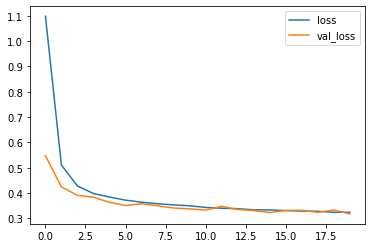

In [17]:
pd.DataFrame(history.history).plot()

# Creating model 2

In [27]:
model_2 = tf.keras.models.Sequential(Layers)
LOSS = "mse"
OPTIMIZER = tf.keras.optimizers.SGD(learning_rate=1e-3) #another method for finding optimizer
model_2.compile(loss= LOSS ,optimizer = OPTIMIZER)

In [28]:
EPOCHS =100
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only =True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir="logs")

CALLBACKS = [checkpoint_cb ,early_stopping_cb,tensorboard_cb]

In [29]:
history = model_2.fit(X_train, y_train, epochs = EPOCHS, validation_data=(X_valid, y_valid), callbacks= CALLBACKS)

Epoch 1/100
363/363 [==============================] - 2s 4ms/step - loss: 0.3151 - val_loss: 0.3117
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3134 - val_loss: 0.3127- ETA: 0s - loss: 0.312
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3134 - val_loss: 0.3144
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3127 - val_loss: 0.3163
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3126 - val_loss: 0.3166
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3124 - val_loss: 0.3183


In [30]:
pd.DataFrame(history.history)

,loss,val_loss
0,0.315087,0.311676
1,0.313409,0.312704
2,0.313386,0.314391
3,0.312692,0.316342
4,0.312558,0.316644
5,0.312358,0.318337


<AxesSubplot:>

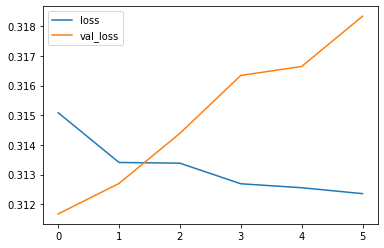

In [31]:
pd.DataFrame(history.history).plot()